### Carol Chiu
### April 20, 2020
# Predicting 2018 Housing Prices on Kaggle
#####Company Real Estate X wants to predict housing prices for next year 2019 from 2018 housing data obtained from Kaggle.com. My task is to build a model that predicts housing prices accurately.

In [ ]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression

In [2]:
#Read in dataset
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
data = pd.concat([train,test])

In [3]:
data.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500.0
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000.0
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000.0
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000.0
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500.0


In [4]:
data = data.fillna(0)

In [5]:
import statistics
statistics.mean(data["SalePrice"])

127028.79112627986

In [6]:
#Clean dataset
data.drop(columns = 'Id', inplace = True)
data.drop(columns = ['Alley', 'Street', 'Fence', 'Misc Feature', 'Misc Val', 'Neighborhood', 'Open Porch SF', 'Enclosed Porch'], inplace = True)
data.drop(columns = 'PID', inplace = True)

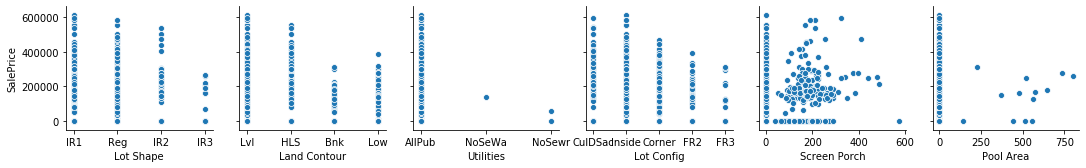

In [7]:
#View pairplot of some features
sns.pairplot(data, y_vars = ['SalePrice'], x_vars= ['Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Screen Porch', 'Pool Area']);

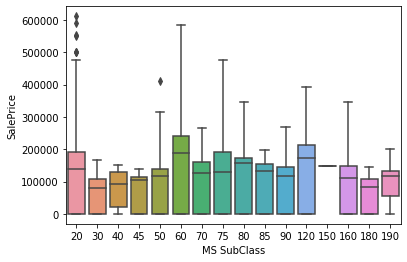

In [8]:
#View boxplot of MS SubClass
sns.boxplot(x = 'MS SubClass', y = 'SalePrice', data = data)

In [9]:
#Turn MS SubClass from discrete to categorical
data = pd.get_dummies(data, columns=['MS SubClass'])

In [10]:
#Grouping houses by MS SubClass
one_eighty = data.groupby('MS SubClass_180').mean()[['SalePrice']].drop(0, axis = 0)
one_ninety = data.groupby('MS SubClass_190').mean()[['SalePrice']].drop(0, axis = 0)
one_sixty = data.groupby('MS SubClass_160').mean()[['SalePrice']].drop(0, axis = 0)

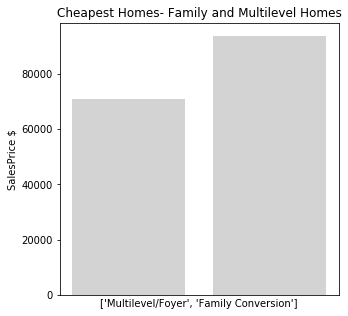

In [11]:
#View SalesPrice for SubClass
plt.figure(figsize=(5,5))
x = ['MS SubClass_180','MS SubClass_190']
y = [float(one_eighty['SalePrice'].values), float(one_ninety['SalePrice'].values)]
plt.bar(x,y, color = 'lightgray')
plt.xticks([])
plt.xlabel(["Multilevel/Foyer","Family Conversion"], color = 'black')
plt.ylabel("SalesPrice $", color = 'black')
plt.title('Cheapest Homes- Family and Multilevel Homes', color = 'black');

In [12]:
one_sixty = data.groupby('MS SubClass_160').mean()[['SalePrice']].drop(0, axis = 0)
one_fifty = data.groupby('MS SubClass_150').mean()[['SalePrice']].drop(0, axis = 0)
one_twenty = data.groupby('MS SubClass_120').mean()[['SalePrice']].drop(0, axis = 0)

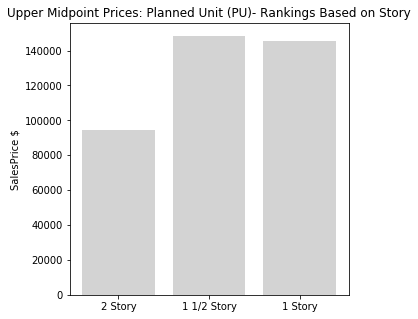

In [13]:
plt.figure(figsize=(5,5))
x = ['MS SubClass_160','MS SubClass_150', 'MS SubClass_120']
y = [float(one_sixty['SalePrice'].values), float(one_fifty['SalePrice'].values), float(one_twenty['SalePrice'].values)]
plt.bar(x,y, color = 'lightgray')
plt.xticks(ticks = [0,1,2], labels = ["2 Story", "1 1/2 Story", "1 Story"], color = 'black')
plt.ylabel("SalesPrice $", color = 'black')
plt.title('Upper Midpoint Prices: Planned Unit (PU)- Rankings Based on Story', color = 'black');

In [14]:
thirty = data.groupby('MS SubClass_30').mean()[['SalePrice']].drop(0, axis = 0)
forty = data.groupby('MS SubClass_40').mean()[['SalePrice']].drop(0, axis = 0)
forty_five = data.groupby('MS SubClass_45').mean()[['SalePrice']].drop(0, axis = 0)
fifty = data.groupby('MS SubClass_50').mean()[['SalePrice']].drop(0, axis = 0)
seventy = data.groupby('MS SubClass_70').mean()[['SalePrice']].drop(0, axis = 0)
twenty = data.groupby('MS SubClass_20').mean()[['SalePrice']].drop(0, axis = 0)

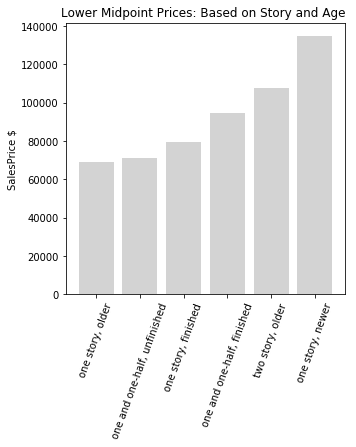

In [15]:
plt.figure(figsize=(5,5))
x = ['MS SubClass_30','MS SubClass_45', 'MS SubClass_40','MS SubClass_50' , 'MS SubClass_70', 'MS SubClass_20']
y = [float(thirty['SalePrice'].values), float(forty_five['SalePrice'].values), float(forty['SalePrice'].values), float(fifty['SalePrice'].values),float(seventy['SalePrice'].values), float(twenty['SalePrice'].values)]
plt.bar(x,y, color = 'lightgray')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['one story, older', 'one and one-half, unfinished', 'one story, finished', 'one and one-half, finished', 'two story, older', 'one story, newer'], rotation=70, color = 'black')
plt.ylabel("SalesPrice $", color = 'black')
plt.title('Lower Midpoint Prices: Based on Story and Age ', color = 'black');

In [16]:
seventy_five = data.groupby('MS SubClass_75').mean()[['SalePrice']].drop(0, axis = 0)
sixty = data.groupby('MS SubClass_60').mean()[['SalePrice']].drop(0, axis = 0)

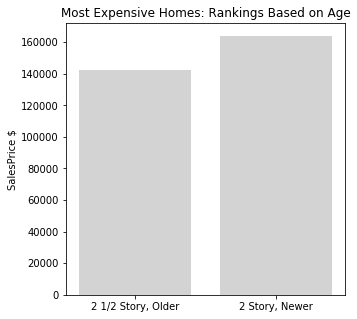

In [17]:
plt.figure(figsize=(5,5))
x = ['MS SubClass_75','MS SubClass_60']
y = [float(seventy_five['SalePrice'].values), float(sixty['SalePrice'].values)]
plt.bar(x,y, color = "lightgray")
plt.xticks(ticks = [0,1], labels = ["2 1/2 Story, Older", "2 Story, Newer"], color = 'black')
plt.ylabel("SalesPrice $", color = 'black')
plt.title('Most Expensive Homes: Rankings Based on Age', color = 'black');

In [18]:
ninety = data.groupby('MS SubClass_90').mean()[['SalePrice']].drop(0, axis = 0)
eighty_five = data.groupby('MS SubClass_85').mean()[['SalePrice']].drop(0, axis = 0)
eighty = data.groupby('MS SubClass_80').mean()[['SalePrice']].drop(0, axis = 0)

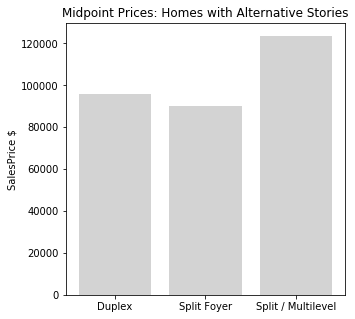

In [19]:
plt.figure(figsize=(5,5))
x = ['MS SubClass_90','MS SubClass_85', 'MS SubClass_80']
y = [float(ninety['SalePrice'].values), float(eighty_five['SalePrice'].values),float(eighty['SalePrice'].values) ]
plt.bar(x,y, color = 'lightgray')
plt.xticks(ticks = [0,1,2], labels = ["Duplex", "Split Foyer", "Split / Multilevel"], color = 'black')
plt.ylabel("SalesPrice $", color = 'black')
plt.title('Midpoint Prices: Homes with Alternative Stories', color = 'black');

In [20]:
data.columns

Index(['MS Zoning', 'Lot Frontage', 'Lot Area', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Condition 1', 'Condition 2',
       'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area',
       'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces',
       'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish',
       'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Co

In [21]:
data.dtypes

MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Lot Shape           object
Land Contour        object
                    ...   
MS SubClass_120      uint8
MS SubClass_150      uint8
MS SubClass_160      uint8
MS SubClass_180      uint8
MS SubClass_190      uint8
Length: 86, dtype: object

In [22]:
pd.set_option('max_columns', None)

In [23]:
data.head()

,MS Zoning,Lot Frontage,Lot Area,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Mo Sold,Yr Sold,Sale Type,SalePrice,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190
0,RL,0.0,13517,IR1,Lvl,AllPub,CulDSac,Gtl,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,0,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,0,0,0,0,3,2010,WD,130500.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,RL,43.0,11492,IR1,Lvl,AllPub,CulDSac,Gtl,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,0,0,0,0,4,2009,WD,220000.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,RL,68.0,7922,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,0,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,0,0,0,0,1,2010,WD,109000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,RL,73.0,9802,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,0,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,4,2010,WD,174000.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,RL,82.0,14235,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,0,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,0,0,0,0,3,2010,WD,138500.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [24]:
X = data[['Lot Frontage',"Lot Area","Overall Qual","Overall Cond","Year Built","Year Remod/Add","Mas Vnr Area","BsmtFin SF 1","Bsmt Unf SF","Total Bsmt SF","1st Flr SF","2nd Flr SF","Gr Liv Area","Bsmt Full Bath","Full Bath","Half Bath","Bedroom AbvGr","Kitchen AbvGr","TotRms AbvGrd","Fireplaces","Garage Yr Blt","Garage Cars","Garage Area","Screen Porch","Pool Area","Mo Sold","Yr Sold","MS SubClass_20","MS SubClass_30"]]

In [25]:
y=data["SalePrice"]

In [26]:
X.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Screen Porch,Pool Area,Mo Sold,Yr Sold,MS SubClass_20,MS SubClass_30
0,0.0,13517,6,8,1976,2005,289.0,533.0,192.0,725.0,725,754,1479,0.0,2,1,3,1,6,0,1976.0,2.0,475.0,0,0,3,2010,0,0
1,43.0,11492,7,5,1996,1997,132.0,637.0,276.0,913.0,913,1209,2122,1.0,2,1,4,1,8,1,1997.0,2.0,559.0,0,0,4,2009,0,0
2,68.0,7922,5,7,1953,2007,0.0,731.0,326.0,1057.0,1057,0,1057,1.0,1,0,3,1,5,0,1953.0,1.0,246.0,0,0,1,2010,1,0
3,73.0,9802,5,5,2006,2007,0.0,0.0,384.0,384.0,744,700,1444,0.0,2,1,3,1,7,0,2007.0,2.0,400.0,0,0,4,2010,0,0
4,82.0,14235,6,8,1900,1993,0.0,0.0,676.0,676.0,831,614,1445,0.0,2,0,3,1,6,0,1957.0,2.0,484.0,0,0,3,2010,0,0


In [27]:
X.dtypes

Lot Frontage      float64
Lot Area            int64
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
Mas Vnr Area      float64
BsmtFin SF 1      float64
Bsmt Unf SF       float64
Total Bsmt SF     float64
1st Flr SF          int64
2nd Flr SF          int64
Gr Liv Area         int64
Bsmt Full Bath    float64
Full Bath           int64
Half Bath           int64
Bedroom AbvGr       int64
Kitchen AbvGr       int64
TotRms AbvGrd       int64
Fireplaces          int64
Garage Yr Blt     float64
Garage Cars       float64
Garage Area       float64
Screen Porch        int64
Pool Area           int64
Mo Sold             int64
Yr Sold             int64
MS SubClass_20      uint8
MS SubClass_30      uint8
dtype: object

In [28]:
#Import Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [29]:
X_train

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Screen Porch,Pool Area,Mo Sold,Yr Sold,MS SubClass_20,MS SubClass_30
1861,62.0,7404,4,6,1920,1950,0.0,0.0,861.0,861.0,861,0,861,0.0,1,0,2,1,5,0,1920.0,2.0,288.0,0,0,11,2009,0,1
356,105.0,8470,3,2,1915,1982,0.0,0.0,1013.0,1013.0,1013,0,1526,0.0,1,0,2,1,6,0,0.0,0.0,0.0,0,0,10,2009,0,0
1760,57.0,8923,7,5,1998,1998,0.0,189.0,195.0,384.0,751,631,1382,0.0,2,1,3,1,7,1,1998.0,2.0,396.0,0,0,2,2009,0,0
1381,60.0,10800,5,6,1920,1950,0.0,821.0,299.0,1120.0,1130,0,1130,1.0,1,0,2,1,5,1,1970.0,2.0,720.0,0,0,6,2006,0,1
773,60.0,9600,5,5,1920,1960,0.0,234.0,739.0,973.0,1377,973,2350,0.0,2,0,4,2,10,0,1930.0,2.0,393.0,0,0,4,2008,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,69.0,7590,6,5,1966,1966,266.0,512.0,148.0,660.0,660,688,1348,0.0,1,1,3,1,6,1,1966.0,2.0,453.0,0,0,7,2006,0,0
296,0.0,4426,6,5,2004,2004,147.0,697.0,151.0,848.0,848,0,848,1.0,1,0,1,1,3,1,2004.0,2.0,420.0,0,0,5,2008,0,0
1608,0.0,7750,8,5,2002,2002,0.0,353.0,55.0,408.0,779,640,1419,1.0,2,1,3,1,7,1,2002.0,2.0,527.0,0,0,3,2009,0,0
490,50.0,7000,6,7,1926,1950,0.0,374.0,487.0,861.0,861,424,1285,0.0,1,0,3,1,6,0,1950.0,2.0,506.0,0,0,5,2006,0,0


In [30]:
#Scale and fit data
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [31]:
#Run Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train);

In [32]:
lr.score(X_train, y_train)

0.24626062968230744

In [33]:
lr.score(X_test, y_test)

0.23125409995711865

In [34]:
cross_val_score(lr, X_train, y_train, cv=5).mean()

0.21084461634878454

In [48]:
# Instantiate linear regression model without regularization.
lr_model = LassoCV(alphas=np.logspace(0,10,100))

# Fit linear regression model.
lr_model.fit(X_train, y_train)

# Score
lr_model.score(X_train, y_train), lr_model.score(X_test, y_test)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


(0.2443942541050974, 0.2335633750055084)

In [49]:
# Instantiate.
ridge_model = Ridge(alpha=100)

# Fit.
ridge_model.fit(X_train, y_train)

# Generate predictions.
ridge_preds = ridge_model.predict(X_test)
ridge_preds_train = ridge_model.predict(X_train)

# Evaluate model using R2.
print(r2_score(y_train, ridge_preds_train))
print(r2_score(y_test, ridge_preds))

0.244542411813091
0.2332965197969865


In [38]:
# Step 1: Instantiate our model.
logreg = LogisticRegression()

# Step 2: Fit our model.
logreg.fit(X_train, y_train)

print(f'Logistic Regression Intercept: {logreg.intercept_}')
print(f'Logistic Regression Coefficient: {logreg.coef_}')

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression Intercept: [-1.07125846e-06 -2.40815492e-06  1.28274496e-06  8.53394489e-05
 -7.46471395e-06  1.35966904e-04  2.41851546e-06  2.76492356e-04
  1.65851229e-04  1.94420419e-04  1.07932148e-06 -8.95326311e-07
  8.10709395e-07  1.34446101e-05 -1.00435084e-04  4.01814350e-06
  9.15057440e-05  2.22550485e-05 -2.11209364e-04 -2.58918324e-06
 -1.14013659e-07  4.05294571e-05  8.74104401e-04 -3.03075356e-06
 -1.43653277e-04  1.19556125e-04  2.78587279e-07  5.60089879e-06
  1.16393026e-04  5.21051104e-04  2.70058134e-05  8.99467019e-06
  6.32775893e-06  5.82652164e-05  1.39981229e-05  2.22989561e-04
  1.28860845e-04 -2.04300537e-05 -5.41882364e-04  5.88747401e-05
  2.76492800e-04  4.95864276e-07 -6.31309201e-04  2.97394876e-04
 -3.02613534e-05  2.38090979e-04  9.20022311e-07 -4.62558604e-05
 -2.08162405e-03  1.27020591e-04  1.17359704e-03 -3.71447724e-05
  6.97261892e-04  7.49703070e-05  1.56853608e-05  1.04933705e-06
 -9.91660652e-06  2.69570192e-04  1.11854342e-04  2.7143080

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [39]:
# Score
logreg.score(X_train, y_train), logreg.score(X_test, y_test)

(0.5207100591715976, 0.2155525238744884)

In [40]:
# Generate predicted values.
print(f'Logreg predicted values: {logreg.predict(X_train.head())}')

Logreg predicted values: [    0. 85000.     0.     0.     0.]


In [41]:
# Generate predicted probabilities.
probabilities = logreg.predict_proba(X_train.head())

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/base.py:297: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [42]:
probabilities

array([[3.16793969e-01, 5.68330579e-14, 6.41595917e-26, ...,
        1.03515058e-19, 2.77892186e-25, 7.23142239e-55],
       [1.48028774e-01, 9.84338200e-23, 1.81449512e-52, ...,
        4.96134308e-63, 4.38002576e-21, 1.85687459e-54],
       [4.52609320e-01, 2.60485349e-36, 4.12956718e-21, ...,
        1.88673137e-15, 7.25701509e-19, 2.33318461e-41],
       [4.59851277e-01, 1.51975918e-82, 3.38477543e-30, ...,
        1.11872955e-21, 1.12117686e-22, 1.45139964e-31],
       [6.62425078e-01, 2.14824268e-57, 9.46733264e-55, ...,
        5.62172274e-18, 8.83539985e-16, 3.08101463e-52]])

In [43]:
# Define a function called odds to calculate the odds of success.
def odds(p):
    return (p / (1 - p))

In [46]:
odds(probabilities)

array([[4.63687312e-01, 5.68330579e-14, 6.41595917e-26, ...,
        1.03515058e-19, 2.77892186e-25, 7.23142239e-55],
       [1.73748560e-01, 9.84338200e-23, 1.81449512e-52, ...,
        4.96134308e-63, 4.38002576e-21, 1.85687459e-54],
       [8.26848787e-01, 2.60485349e-36, 4.12956718e-21, ...,
        1.88673137e-15, 7.25701509e-19, 2.33318461e-41],
       [8.51341968e-01, 1.51975918e-82, 3.38477543e-30, ...,
        1.11872955e-21, 1.12117686e-22, 1.45139964e-31],
       [1.96230536e+00, 2.14824268e-57, 9.46733264e-55, ...,
        5.62172274e-18, 8.83539985e-16, 3.08101463e-52]])

#####The models have low predictive accuracy. I need to try to find a pattern in the features so that I can put the right features into the train-test split. 